# Predicted Probabilities, Cutoff values and Model Performance
---

<br>

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

In [3]:
import numpy as np

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.metrics import classification_report

In [6]:
from ipywidgets import interact, FloatSlider, fixed

In [7]:
from sklearn.datasets import make_classification

In [8]:
import seaborn as sns
sns.set_style('darkgrid')

# Get Data

In [9]:
X, y = make_classification(n_samples=1000, n_features=15, n_informative=3, n_classes=2, n_clusters_per_class=3, random_state=2, scale=4.0)

## Visualize classification boundary in 2D

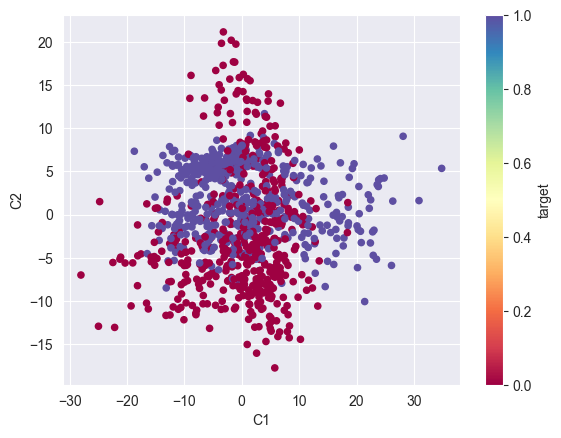

In [10]:
(pd.DataFrame(PCA(n_components=2).fit_transform(X), columns=['C1', 'C2'])
 .join(pd.Series(y, name='target'))
 .plot.scatter(x='C1', y='C2', c='target', cmap='Spectral'));

## Train & Test Model

In [11]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.8, random_state=112233)

In [12]:
scaler = StandardScaler()
scaler.fit(X_tr)

,copy,True
,with_mean,True
,with_std,True


In [13]:
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [14]:
clf = LogisticRegression()

In [15]:
clf.fit(X_tr_scaled, y_tr)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = clf.predict(X_te_scaled)

## Visualize Predicted Probability

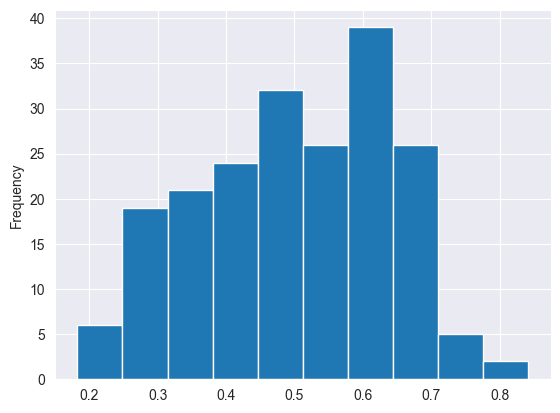

In [17]:
y_probs = clf.predict_proba(X_te_scaled)[:, 1]
pd.Series(y_probs).plot.hist();

## Build Precision Recall Curve to measure impact of changing cutoff

In [18]:
p, r, t = precision_recall_curve(y_te, y_probs, pos_label=1)

df_pr = (pd.DataFrame(data=zip(p, r, t),
                      columns=["precision", "recall", "threshold"])
         .set_index("threshold"))

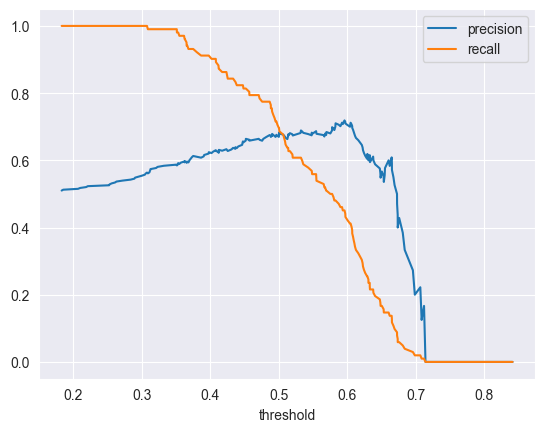

In [19]:
df_pr.plot();

In [20]:
def show_performance_at_cutoff(cutoff, y_probs, y_te):
    """
    """
    y_pred = (y_probs >= cutoff).astype(int)
    print(classification_report(y_te, y_pred))

interact(show_performance_at_cutoff,
        cutoff=FloatSlider(value=0.3, min=0.3, max=0.8, step=0.02),
        y_probs=fixed(y_probs),
        y_te=fixed(y_te));

interactive(children=(FloatSlider(value=0.3, description='cutoff', max=0.8, min=0.3, step=0.02), Output()), _d…

---

<big> 
    
Finding the point where the difference between precision and recall is at its lowest:

In [21]:
cutoff = (pd.Series(data=np.abs(df_pr["precision"] - df_pr["recall"]),
                    index=df_pr.index)
          .idxmin()
          .round(2))

cutoff

np.float64(0.51)

In [22]:
print(classification_report(y_te, (y_probs >= 0.48).astype(int)))

              precision    recall  f1-score   support

           0       0.72      0.60      0.66        98
           1       0.67      0.77      0.72       102

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

